@ Jingchao Song
@ 2021/11/09


In [3]:
import pandas as pd
# import streamlit as st
from datetime import date

import yfinance as yf
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly
from plotly import graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import IPython
import IPython.display
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


import tensorflow as tf
print("tf.__version__:", tf.__version__)
import tensorflow.keras as keras
print("keras.__version__:", keras.__version__)

tf.__version__: 2.5.1
keras.__version__: 2.5.0


In [4]:
#data = pd.read_pickle('./bitcoin_etl_Max_1d.pk1')
#data = pd.read_pickle('./allcoins_60d_1h.pk1')
data = pd.read_pickle('./allcoins_Max_1d.pk1')

#df = pd.read_pickle('./bitcoin_etl_60d.pk1')
#df_csv = pd.read_csv('bitcoin_etl.csv')
data.shape

(2619, 396)

In [5]:
pd.set_option('display.max_columns', None)
data.head()

,BTC-USDClose,ETH-USDClose,BNB-USDClose,USDT-USDClose,SOL1-USDClose,ADA-USDClose,XRP-USDClose,DOT1-USDClose,USDC-USDClose,HEX-USDClose,AVAX-USDClose,DOGE-USDClose,SHIB-USDClose,LUNA1-USDClose,CRO-USDClose,LTC-USDClose,UNI3-USDClose,LINK-USDClose,ALGO-USDClose,MATIC-USDClose,BCH-USDClose,VET-USDClose,ICP1-USDClose,XLM-USDClose,AXS-USDClose,EGLD-USDClose,TRX-USDClose,FTT1-USDClose,MANA-USDClose,THETA-USDClose,ETC-USDClose,FIL-USDClose,DAI1-USDClose,ATOM1-USDClose,HBAR-USDClose,FTM-USDClose,HNT1-USDClose,XTZ-USDClose,XMR-USDClose,FLOW1-USDClose,GRT2-USDClose,EOS-USDClose,CAKE-USDClose,SAND-USDClose,MIOTA-USDClose,AAVE-USDClose,LRC-USDClose,ONE2-USDClose,KSM-USDClose,BSV-USDClose,MKR-USDClose,NEO-USDClose,ENJ-USDClose,KDA-USDClose,RUNE-USDClose,QNT-USDClose,CHZ-USDClose,STX1-USDClose,ZEC-USDClose,HOT1-USDClose,WAVES-USDClose,BTT1-USDClose,AR-USDClose,AMP1-USDClose,CELO-USDClose,DASH-USDClose,COMP-USDClose,IOTX-USDClose,TFUEL-USDClose,XEM-USDClose,CRV-USDClose,BAT-USDClose,WAXP-USDClose,QTUM-USDClose,DCR-USDClose,ICX-USDClose,CTC1-USDClose,ROSE-USDClose,OMG-USDClose,TUSD-USDClose,RVN-USDClose,ZEN-USDClose,YFI-USDClose,OMI-USDClose,SUSHI-USDClose,ZIL-USDClose,VGX-USDClose,XDC-USDClose,ANKR-USDClose,SC-USDClose,UMA-USDClose,BTG-USDClose,VLX-USDClose,SNX-USDClose,BNT-USDClose,CEL-USDClose,ZRX-USDClose,CCXX-USDClose,DFI-USDClose,ONT-USDClose,WIN1-USDClose,SKL-USDClose,CELR-USDClose,IOST-USDClose,DGB-USDClose,SRM-USDClose,RAY-USDClose,CKB-USDClose,NANO-USDClose,KAVA-USDClose,STORJ-USDClose,1INCH-USDClose,XWC-USDClose,NU-USDClose,GNO-USDClose,FET-USDClose,C98-USDClose,GLM-USDClose,SXP-USDClose,RSR-USDClose,VTHO-USDClose,HIVE-USDClose,XVG-USDClose,CTSI-USDClose,LSK-USDClose,TWT-USDClose,NMR-USDClose,ZEL-USDClose,NKN-USDClose,MED-USDClose,COTI-USDClose,ARRR-USDClose,OXT-USDClose,CVC-USDClose,BCD-USDClose,RLC-USDClose,ARDR-USDClose,XCH-USDClose,SNT-USDClose,STMX-USDClose,SYS-USDClose,ZNN-USDClose,ABBC-USDClose,ETN-USDClose,ACH-USDClose,EWT-USDClose,ERG-USDClose,VRA-USDClose,SAPP-USDClose,STRAX-USDClose,BAND-USDClose,TOMO-USDClose,ARK-USDClose,MCO-USDClose,DAG-USDClose,REP-USDClose,DERO-USDClose,STEEM-USDClose,MIR1-USDClose,FUN-USDClose,MAID-USDClose,MTL-USDClose,MLN-USDClose,DIVI-USDClose,XHV-USDClose,ANT-USDClose,PHA-USDClose,WAN-USDClose,META-USDClose,POA-USDClose,CLV-USDClose,RBTC-USDClose,KIN-USDClose,BTS-USDClose,BAL-USDClose,IRIS-USDClose,HNS-USDClose,AVA-USDClose,KMD-USDClose,MARO-USDClose,TT-USDClose,NRG-USDClose,DNT-USDClose,NYE-USDClose,ADX-USDClose,CUDOS-USDClose,MONA-USDClose,FIRO-USDClose,XAS-USDClose,ATRI-USDClose,ELA-USDClose,AION-USDClose,XNC-USDClose,WTC-USDClose,GAS-USDClose,RDD-USDClose,DMCH-USDClose,GRS-USDClose,FIO-USDClose,BTM-USDClose,PAC-USDClose,BEAM-USDClose,REV-USDClose,MWC-USDClose,WOZX-USDClose,SBD-USDClose,CRU-USDClose,FRONT-USDClose,BCN-USDClose,DGD-USDClose,CET-USDClose,APL-USDClose,VITE-USDClose,BEPRO-USDClose,NIM-USDClose,AE-USDClose,NULS-USDClose,PIVX-USDClose,SOLVE-USDClose,VERI-USDClose,VSYS-USDClose,GXC-USDClose,AXEL-USDClose,GO-USDClose,LOKI-USDClose,SERO-USDClose,XCP-USDClose,NAV-USDClose,PPT-USDClose,NXS-USDClose,GAME-USDClose,PCX-USDClose,CTXC-USDClose,CUT-USDClose,GBYTE-USDClose,WICC-USDClose,SRK-USDClose,VTC-USDClose,KRT-USDClose,GRIN-USDClose,QASH-USDClose,FSN-USDClose,ZANO-USDClose,OBSR-USDClose,MHC-USDClose,ADK-USDClose,VAL1-USDClose,CHI-USDClose,NMC-USDClose,XSN-USDClose,PPC-USDClose,HC-USDClose,NAS-USDClose,MASS-USDClose,LBC-USDClose,QRL-USDClose,NEBL-USDClose,AMB-USDClose,RSTR-USDClose,WABI-USDClose,PART-USDClose,PAI-USDClose,ETP-USDClose,MAN-USDClose,BIP-USDClose,FO-USDClose,BTC2-USDClose,NXT-USDClose,FCT-USDClose,DTEP-USDClose,YOYOW-USDClose,PAY-USDClose,PZM-USDClose,RINGX-USDClose,SCP-USDClose,PI-USDClose,DCN-USDClose,TRUE-USDClose,SALT-USDClose,LCC-USDClose,PLC-USDClose,DMD-USDClose,DNA1-USDClose,EMC2-USDClose,BHP-USDClose,MRX-USDClose,DYN-USDClose,HPB-USDClose,SCC3-USDClose,NLG-USDClose,POLIS-USDClose,UBQ-USDClose,BLOCK-USDClose,HTML-USDClose,ACT-USDClose,TRTL-USDClose,AEON-USDClose,IDN

In [6]:
list(data)

['BTC-USDClose',
 'ETH-USDClose',
 'BNB-USDClose',
 'USDT-USDClose',
 'SOL1-USDClose',
 'ADA-USDClose',
 'XRP-USDClose',
 'DOT1-USDClose',
 'USDC-USDClose',
 'HEX-USDClose',
 'AVAX-USDClose',
 'DOGE-USDClose',
 'SHIB-USDClose',
 'LUNA1-USDClose',
 'CRO-USDClose',
 'LTC-USDClose',
 'UNI3-USDClose',
 'LINK-USDClose',
 'ALGO-USDClose',
 'MATIC-USDClose',
 'BCH-USDClose',
 'VET-USDClose',
 'ICP1-USDClose',
 'XLM-USDClose',
 'AXS-USDClose',
 'EGLD-USDClose',
 'TRX-USDClose',
 'FTT1-USDClose',
 'MANA-USDClose',
 'THETA-USDClose',
 'ETC-USDClose',
 'FIL-USDClose',
 'DAI1-USDClose',
 'ATOM1-USDClose',
 'HBAR-USDClose',
 'FTM-USDClose',
 'HNT1-USDClose',
 'XTZ-USDClose',
 'XMR-USDClose',
 'FLOW1-USDClose',
 'GRT2-USDClose',
 'EOS-USDClose',
 'CAKE-USDClose',
 'SAND-USDClose',
 'MIOTA-USDClose',
 'AAVE-USDClose',
 'LRC-USDClose',
 'ONE2-USDClose',
 'KSM-USDClose',
 'BSV-USDClose',
 'MKR-USDClose',
 'NEO-USDClose',
 'ENJ-USDClose',
 'KDA-USDClose',
 'RUNE-USDClose',
 'QNT-USDClose',
 'CHZ-USDClos

In [ ]:
#data['Ratio'] = data['Close']/data['ETH-USDClose']

In [ ]:
# #Variables for training
# cols = ['Open',
#  'High',
#  'Low',
#  'Close',
#  'Volume','ETH-USDOpen',
#  'ETH-USDHigh',
#  'ETH-USDLow',
#  'ETH-USDClose',
#        'Ratio']
# #Date and volume columns are not used in training. 
# print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

In [8]:
df = pd.DataFrame(data)
df

,BTC-USDClose,ETH-USDClose,BNB-USDClose,USDT-USDClose,SOL1-USDClose,ADA-USDClose,XRP-USDClose,DOT1-USDClose,USDC-USDClose,HEX-USDClose,AVAX-USDClose,DOGE-USDClose,SHIB-USDClose,LUNA1-USDClose,CRO-USDClose,LTC-USDClose,UNI3-USDClose,LINK-USDClose,ALGO-USDClose,MATIC-USDClose,BCH-USDClose,VET-USDClose,ICP1-USDClose,XLM-USDClose,AXS-USDClose,EGLD-USDClose,TRX-USDClose,FTT1-USDClose,MANA-USDClose,THETA-USDClose,ETC-USDClose,FIL-USDClose,DAI1-USDClose,ATOM1-USDClose,HBAR-USDClose,FTM-USDClose,HNT1-USDClose,XTZ-USDClose,XMR-USDClose,FLOW1-USDClose,GRT2-USDClose,EOS-USDClose,CAKE-USDClose,SAND-USDClose,MIOTA-USDClose,AAVE-USDClose,LRC-USDClose,ONE2-USDClose,KSM-USDClose,BSV-USDClose,MKR-USDClose,NEO-USDClose,ENJ-USDClose,KDA-USDClose,RUNE-USDClose,QNT-USDClose,CHZ-USDClose,STX1-USDClose,ZEC-USDClose,HOT1-USDClose,WAVES-USDClose,BTT1-USDClose,AR-USDClose,AMP1-USDClose,CELO-USDClose,DASH-USDClose,COMP-USDClose,IOTX-USDClose,TFUEL-USDClose,XEM-USDClose,CRV-USDClose,BAT-USDClose,WAXP-USDClose,QTUM-USDClose,DCR-USDClose,ICX-USDClose,CTC1-USDClose,ROSE-USDClose,OMG-USDClose,TUSD-USDClose,RVN-USDClose,ZEN-USDClose,YFI-USDClose,OMI-USDClose,SUSHI-USDClose,ZIL-USDClose,VGX-USDClose,XDC-USDClose,ANKR-USDClose,SC-USDClose,UMA-USDClose,BTG-USDClose,VLX-USDClose,SNX-USDClose,BNT-USDClose,CEL-USDClose,ZRX-USDClose,CCXX-USDClose,DFI-USDClose,ONT-USDClose,WIN1-USDClose,SKL-USDClose,CELR-USDClose,IOST-USDClose,DGB-USDClose,SRM-USDClose,RAY-USDClose,CKB-USDClose,NANO-USDClose,KAVA-USDClose,STORJ-USDClose,1INCH-USDClose,XWC-USDClose,NU-USDClose,GNO-USDClose,FET-USDClose,C98-USDClose,GLM-USDClose,SXP-USDClose,RSR-USDClose,VTHO-USDClose,HIVE-USDClose,XVG-USDClose,CTSI-USDClose,LSK-USDClose,TWT-USDClose,NMR-USDClose,ZEL-USDClose,NKN-USDClose,MED-USDClose,COTI-USDClose,ARRR-USDClose,OXT-USDClose,CVC-USDClose,BCD-USDClose,RLC-USDClose,ARDR-USDClose,XCH-USDClose,SNT-USDClose,STMX-USDClose,SYS-USDClose,ZNN-USDClose,ABBC-USDClose,ETN-USDClose,ACH-USDClose,EWT-USDClose,ERG-USDClose,VRA-USDClose,SAPP-USDClose,STRAX-USDClose,BAND-USDClose,TOMO-USDClose,ARK-USDClose,MCO-USDClose,DAG-USDClose,REP-USDClose,DERO-USDClose,STEEM-USDClose,MIR1-USDClose,FUN-USDClose,MAID-USDClose,MTL-USDClose,MLN-USDClose,DIVI-USDClose,XHV-USDClose,ANT-USDClose,PHA-USDClose,WAN-USDClose,META-USDClose,POA-USDClose,CLV-USDClose,RBTC-USDClose,KIN-USDClose,BTS-USDClose,BAL-USDClose,IRIS-USDClose,HNS-USDClose,AVA-USDClose,KMD-USDClose,MARO-USDClose,TT-USDClose,NRG-USDClose,DNT-USDClose,NYE-USDClose,ADX-USDClose,CUDOS-USDClose,MONA-USDClose,FIRO-USDClose,XAS-USDClose,ATRI-USDClose,ELA-USDClose,AION-USDClose,XNC-USDClose,WTC-USDClose,GAS-USDClose,RDD-USDClose,DMCH-USDClose,GRS-USDClose,FIO-USDClose,BTM-USDClose,PAC-USDClose,BEAM-USDClose,REV-USDClose,MWC-USDClose,WOZX-USDClose,SBD-USDClose,CRU-USDClose,FRONT-USDClose,BCN-USDClose,DGD-USDClose,CET-USDClose,APL-USDClose,VITE-USDClose,BEPRO-USDClose,NIM-USDClose,AE-USDClose,NULS-USDClose,PIVX-USDClose,SOLVE-USDClose,VERI-USDClose,VSYS-USDClose,GXC-USDClose,AXEL-USDClose,GO-USDClose,LOKI-USDClose,SERO-USDClose,XCP-USDClose,NAV-USDClose,PPT-USDClose,NXS-USDClose,GAME-USDClose,PCX-USDClose,CTXC-USDClose,CUT-USDClose,GBYTE-USDClose,WICC-USDClose,SRK-USDClose,VTC-USDClose,KRT-USDClose,GRIN-USDClose,QASH-USDClose,FSN-USDClose,ZANO-USDClose,OBSR-USDClose,MHC-USDClose,ADK-USDClose,VAL1-USDClose,CHI-USDClose,NMC-USDClose,XSN-USDClose,PPC-USDClose,HC-USDClose,NAS-USDClose,MASS-USDClose,LBC-USDClose,QRL-USDClose,NEBL-USDClose,AMB-USDClose,RSTR-USDClose,WABI-USDClose,PART-USDClose,PAI-USDClose,ETP-USDClose,MAN-USDClose,BIP-USDClose,FO-USDClose,BTC2-USDClose,NXT-USDClose,FCT-USDClose,DTEP-USDClose,YOYOW-USDClose,PAY-USDClose,PZM-USDClose,RINGX-USDClose,SCP-USDClose,PI-USDClose,DCN-USDClose,TRUE-USDClose,SALT-USDClose,LCC-USDClose,PLC-USDClose,DMD-USDClose,DNA1-USDClose,EMC2-USDClose,BHP-USDClose,MRX-USDClose,DYN-USDClose,HPB-USDClose,SCC3-USDClose,NLG-USDClose,POLIS-USDClose,UBQ-USDClose,BLOCK-USDClose,HTML-USDClose,ACT-USDClose,TRTL-USDClose,AEON-USDClose,IDN

<AxesSubplot:xlabel='Date'>

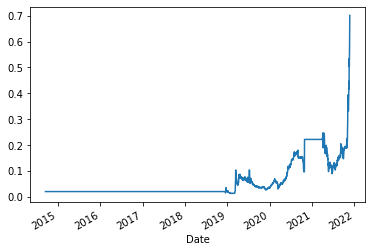

In [12]:
df['CRO-USDClose'].plot()

In [13]:
cro = df[['CRO-USDClose']]
cro

,CRO-USDClose
Date,
2014-09-17,0.019606
2014-09-18,0.019606
2014-09-19,0.019606
2014-09-20,0.019606
2014-09-21,0.019606
...,...
2021-11-17,0.533889
2021-11-18,0.503313
2021-11-19,0.570865


In [16]:
cro['Log'] = np.log(cro['CRO-USDClose'])
cro['LogRet'] = np.log(cro['CRO-USDClose']).diff()
cro

C:\Users\jingc\AppData\Local\Temp/ipykernel_20360/1286095202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cro['Log'] = np.log(cro['CRO-USDClose'])
C:\Users\jingc\AppData\Local\Temp/ipykernel_20360/1286095202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cro['LogRet'] = np.log(cro['CRO-USDClose']).diff()


,CRO-USDClose,Log,LogRet
Date,,,
2014-09-17,0.019606,-3.931920,NaN
2014-09-18,0.019606,-3.931920,0.000000
2014-09-19,0.019606,-3.931920,0.000000
2014-09-20,0.019606,-3.931920,0.000000
2014-09-21,0.019606,-3.931920,0.000000
...,...,...,...
2021-11-17,0.533889,-0.627567,0.249087
2021-11-18,0.503313,-0.686543,-0.058976
2021-11-19,0.570865,-0.560603,0.125940


<AxesSubplot:xlabel='Date'>

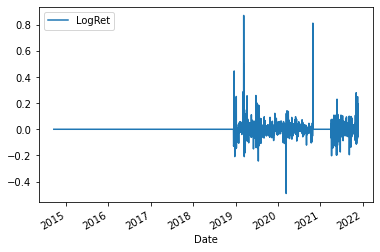

In [17]:
cro[['LogRet']].plot()

In [7]:
cols = list(df)
cols

['BTC-USDClose',
 'ETH-USDClose',
 'BNB-USDClose',
 'USDT-USDClose',
 'SOL1-USDClose',
 'ADA-USDClose',
 'XRP-USDClose',
 'DOT1-USDClose',
 'USDC-USDClose',
 'HEX-USDClose',
 'AVAX-USDClose',
 'DOGE-USDClose',
 'SHIB-USDClose',
 'LUNA1-USDClose',
 'CRO-USDClose',
 'LTC-USDClose',
 'UNI3-USDClose',
 'LINK-USDClose',
 'ALGO-USDClose',
 'MATIC-USDClose',
 'BCH-USDClose',
 'VET-USDClose',
 'ICP1-USDClose',
 'XLM-USDClose',
 'AXS-USDClose',
 'EGLD-USDClose',
 'TRX-USDClose',
 'FTT1-USDClose',
 'MANA-USDClose',
 'THETA-USDClose',
 'ETC-USDClose',
 'FIL-USDClose',
 'DAI1-USDClose',
 'ATOM1-USDClose',
 'HBAR-USDClose',
 'FTM-USDClose',
 'HNT1-USDClose',
 'XTZ-USDClose',
 'XMR-USDClose',
 'FLOW1-USDClose',
 'GRT2-USDClose',
 'EOS-USDClose',
 'CAKE-USDClose',
 'SAND-USDClose',
 'MIOTA-USDClose',
 'AAVE-USDClose',
 'LRC-USDClose',
 'ONE2-USDClose',
 'KSM-USDClose',
 'BSV-USDClose',
 'MKR-USDClose',
 'NEO-USDClose',
 'ENJ-USDClose',
 'KDA-USDClose',
 'RUNE-USDClose',
 'QNT-USDClose',
 'CHZ-USDClos

In [15]:
def get_log_ret (cols):
    new_cols = []
    for i in cols:
        df['Log'+ i] = np.log(df[i])
        df['LogRet'+i] = df['Log'+ i].diff()
        #df['LogRet'+i].plot()
        new_cols.append('LogRet'+i)
    return new_cols

new_cols = get_log_ret (cols)

NameError: name 'cols' is not defined

In [9]:
get_log_ret(cols)

['LogRetBTC-USDClose',
 'LogRetETH-USDClose',
 'LogRetBNB-USDClose',
 'LogRetUSDT-USDClose',
 'LogRetSOL1-USDClose',
 'LogRetADA-USDClose',
 'LogRetXRP-USDClose',
 'LogRetDOT1-USDClose',
 'LogRetUSDC-USDClose',
 'LogRetHEX-USDClose',
 'LogRetAVAX-USDClose',
 'LogRetDOGE-USDClose',
 'LogRetSHIB-USDClose',
 'LogRetLUNA1-USDClose',
 'LogRetCRO-USDClose',
 'LogRetLTC-USDClose',
 'LogRetUNI3-USDClose',
 'LogRetLINK-USDClose',
 'LogRetALGO-USDClose',
 'LogRetMATIC-USDClose',
 'LogRetBCH-USDClose',
 'LogRetVET-USDClose',
 'LogRetICP1-USDClose',
 'LogRetXLM-USDClose',
 'LogRetAXS-USDClose',
 'LogRetEGLD-USDClose',
 'LogRetTRX-USDClose',
 'LogRetFTT1-USDClose',
 'LogRetMANA-USDClose',
 'LogRetTHETA-USDClose',
 'LogRetETC-USDClose',
 'LogRetFIL-USDClose',
 'LogRetDAI1-USDClose',
 'LogRetATOM1-USDClose',
 'LogRetHBAR-USDClose',
 'LogRetFTM-USDClose',
 'LogRetHNT1-USDClose',
 'LogRetXTZ-USDClose',
 'LogRetXMR-USDClose',
 'LogRetFLOW1-USDClose',
 'LogRetGRT2-USDClose',
 'LogRetEOS-USDClose',
 'LogR

<AxesSubplot:xlabel='Date'>

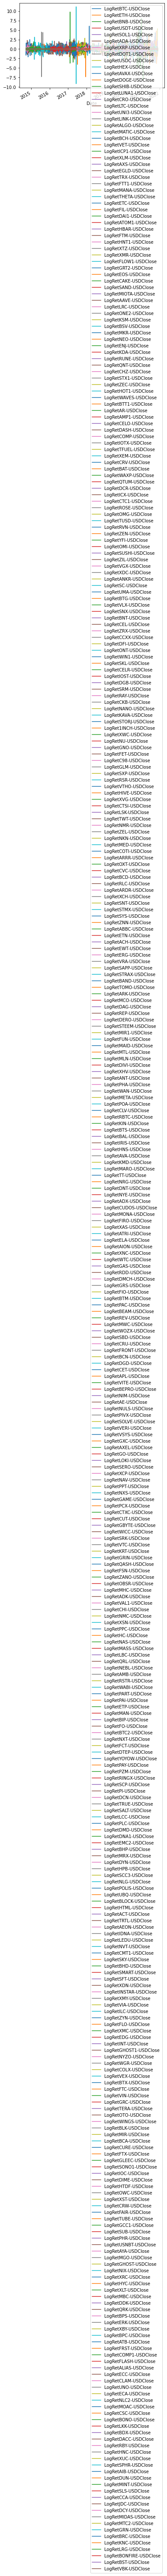

In [10]:
df[new_cols].plot()

In [11]:
df.reset_index(inplace = True)
df.dropna(inplace = True)
df.tail()

,Date,BTC-USDClose,ETH-USDClose,BNB-USDClose,USDT-USDClose,SOL1-USDClose,ADA-USDClose,XRP-USDClose,DOT1-USDClose,USDC-USDClose,HEX-USDClose,AVAX-USDClose,DOGE-USDClose,SHIB-USDClose,LUNA1-USDClose,CRO-USDClose,LTC-USDClose,UNI3-USDClose,LINK-USDClose,ALGO-USDClose,MATIC-USDClose,BCH-USDClose,VET-USDClose,ICP1-USDClose,XLM-USDClose,AXS-USDClose,EGLD-USDClose,TRX-USDClose,FTT1-USDClose,MANA-USDClose,THETA-USDClose,ETC-USDClose,FIL-USDClose,DAI1-USDClose,ATOM1-USDClose,HBAR-USDClose,FTM-USDClose,HNT1-USDClose,XTZ-USDClose,XMR-USDClose,FLOW1-USDClose,GRT2-USDClose,EOS-USDClose,CAKE-USDClose,SAND-USDClose,MIOTA-USDClose,AAVE-USDClose,LRC-USDClose,ONE2-USDClose,KSM-USDClose,BSV-USDClose,MKR-USDClose,NEO-USDClose,ENJ-USDClose,KDA-USDClose,RUNE-USDClose,QNT-USDClose,CHZ-USDClose,STX1-USDClose,ZEC-USDClose,HOT1-USDClose,WAVES-USDClose,BTT1-USDClose,AR-USDClose,AMP1-USDClose,CELO-USDClose,DASH-USDClose,COMP-USDClose,IOTX-USDClose,TFUEL-USDClose,XEM-USDClose,CRV-USDClose,BAT-USDClose,WAXP-USDClose,QTUM-USDClose,DCR-USDClose,ICX-USDClose,CTC1-USDClose,ROSE-USDClose,OMG-USDClose,TUSD-USDClose,RVN-USDClose,ZEN-USDClose,YFI-USDClose,OMI-USDClose,SUSHI-USDClose,ZIL-USDClose,VGX-USDClose,XDC-USDClose,ANKR-USDClose,SC-USDClose,UMA-USDClose,BTG-USDClose,VLX-USDClose,SNX-USDClose,BNT-USDClose,CEL-USDClose,ZRX-USDClose,CCXX-USDClose,DFI-USDClose,ONT-USDClose,WIN1-USDClose,SKL-USDClose,CELR-USDClose,IOST-USDClose,DGB-USDClose,SRM-USDClose,RAY-USDClose,CKB-USDClose,NANO-USDClose,KAVA-USDClose,STORJ-USDClose,1INCH-USDClose,XWC-USDClose,NU-USDClose,GNO-USDClose,FET-USDClose,C98-USDClose,GLM-USDClose,SXP-USDClose,RSR-USDClose,VTHO-USDClose,HIVE-USDClose,XVG-USDClose,CTSI-USDClose,LSK-USDClose,TWT-USDClose,NMR-USDClose,ZEL-USDClose,NKN-USDClose,MED-USDClose,COTI-USDClose,ARRR-USDClose,OXT-USDClose,CVC-USDClose,BCD-USDClose,RLC-USDClose,ARDR-USDClose,XCH-USDClose,SNT-USDClose,STMX-USDClose,SYS-USDClose,ZNN-USDClose,ABBC-USDClose,ETN-USDClose,ACH-USDClose,EWT-USDClose,ERG-USDClose,VRA-USDClose,SAPP-USDClose,STRAX-USDClose,BAND-USDClose,TOMO-USDClose,ARK-USDClose,MCO-USDClose,DAG-USDClose,REP-USDClose,DERO-USDClose,STEEM-USDClose,MIR1-USDClose,FUN-USDClose,MAID-USDClose,MTL-USDClose,MLN-USDClose,DIVI-USDClose,XHV-USDClose,ANT-USDClose,PHA-USDClose,WAN-USDClose,META-USDClose,POA-USDClose,CLV-USDClose,RBTC-USDClose,KIN-USDClose,BTS-USDClose,BAL-USDClose,IRIS-USDClose,HNS-USDClose,AVA-USDClose,KMD-USDClose,MARO-USDClose,TT-USDClose,NRG-USDClose,DNT-USDClose,NYE-USDClose,ADX-USDClose,CUDOS-USDClose,MONA-USDClose,FIRO-USDClose,XAS-USDClose,ATRI-USDClose,ELA-USDClose,AION-USDClose,XNC-USDClose,WTC-USDClose,GAS-USDClose,RDD-USDClose,DMCH-USDClose,GRS-USDClose,FIO-USDClose,BTM-USDClose,PAC-USDClose,BEAM-USDClose,REV-USDClose,MWC-USDClose,WOZX-USDClose,SBD-USDClose,CRU-USDClose,FRONT-USDClose,BCN-USDClose,DGD-USDClose,CET-USDClose,APL-USDClose,VITE-USDClose,BEPRO-USDClose,NIM-USDClose,AE-USDClose,NULS-USDClose,PIVX-USDClose,SOLVE-USDClose,VERI-USDClose,VSYS-USDClose,GXC-USDClose,AXEL-USDClose,GO-USDClose,LOKI-USDClose,SERO-USDClose,XCP-USDClose,NAV-USDClose,PPT-USDClose,NXS-USDClose,GAME-USDClose,PCX-USDClose,CTXC-USDClose,CUT-USDClose,GBYTE-USDClose,WICC-USDClose,SRK-USDClose,VTC-USDClose,KRT-USDClose,GRIN-USDClose,QASH-USDClose,FSN-USDClose,ZANO-USDClose,OBSR-USDClose,MHC-USDClose,ADK-USDClose,VAL1-USDClose,CHI-USDClose,NMC-USDClose,XSN-USDClose,PPC-USDClose,HC-USDClose,NAS-USDClose,MASS-USDClose,LBC-USDClose,QRL-USDClose,NEBL-USDClose,AMB-USDClose,RSTR-USDClose,WABI-USDClose,PART-USDClose,PAI-USDClose,ETP-USDClose,MAN-USDClose,BIP-USDClose,FO-USDClose,BTC2-USDClose,NXT-USDClose,FCT-USDClose,DTEP-USDClose,YOYOW-USDClose,PAY-USDClose,PZM-USDClose,RINGX-USDClose,SCP-USDClose,PI-USDClose,DCN-USDClose,TRUE-USDClose,SALT-USDClose,LCC-USDClose,PLC-USDClose,DMD-USDClose,DNA1-USDClose,EMC2-USDClose,BHP-USDClose,MRX-USDClose,DYN-USDClose,HPB-USDClose,SCC3-USDClose,NLG-USDClose,POLIS-USDClose,UBQ-USDClose,BLOCK-USDClose,HTML-USDClose,ACT-USDClose,TRTL-USDClose,AEON-USDClos

In [12]:
df.shape

(2618, 1189)

In [13]:
df_pre_train = df[new_cols]
df_pre_train

,LogRetBTC-USDClose,LogRetETH-USDClose,LogRetBNB-USDClose,LogRetUSDT-USDClose,LogRetSOL1-USDClose,LogRetADA-USDClose,LogRetXRP-USDClose,LogRetDOT1-USDClose,LogRetUSDC-USDClose,LogRetHEX-USDClose,LogRetAVAX-USDClose,LogRetDOGE-USDClose,LogRetSHIB-USDClose,LogRetLUNA1-USDClose,LogRetCRO-USDClose,LogRetLTC-USDClose,LogRetUNI3-USDClose,LogRetLINK-USDClose,LogRetALGO-USDClose,LogRetMATIC-USDClose,LogRetBCH-USDClose,LogRetVET-USDClose,LogRetICP1-USDClose,LogRetXLM-USDClose,LogRetAXS-USDClose,LogRetEGLD-USDClose,LogRetTRX-USDClose,LogRetFTT1-USDClose,LogRetMANA-USDClose,LogRetTHETA-USDClose,LogRetETC-USDClose,LogRetFIL-USDClose,LogRetDAI1-USDClose,LogRetATOM1-USDClose,LogRetHBAR-USDClose,LogRetFTM-USDClose,LogRetHNT1-USDClose,LogRetXTZ-USDClose,LogRetXMR-USDClose,LogRetFLOW1-USDClose,LogRetGRT2-USDClose,LogRetEOS-USDClose,LogRetCAKE-USDClose,LogRetSAND-USDClose,LogRetMIOTA-USDClose,LogRetAAVE-USDClose,LogRetLRC-USDClose,LogRetONE2-USDClose,LogRetKSM-USDClose,LogRetBSV-USDClose,LogRetMKR-USDClose,LogRetNEO-USDClose,LogRetENJ-USDClose,LogRetKDA-USDClose,LogRetRUNE-USDClose,LogRetQNT-USDClose,LogRetCHZ-USDClose,LogRetSTX1-USDClose,LogRetZEC-USDClose,LogRetHOT1-USDClose,LogRetWAVES-USDClose,LogRetBTT1-USDClose,LogRetAR-USDClose,LogRetAMP1-USDClose,LogRetCELO-USDClose,LogRetDASH-USDClose,LogRetCOMP-USDClose,LogRetIOTX-USDClose,LogRetTFUEL-USDClose,LogRetXEM-USDClose,LogRetCRV-USDClose,LogRetBAT-USDClose,LogRetWAXP-USDClose,LogRetQTUM-USDClose,LogRetDCR-USDClose,LogRetICX-USDClose,LogRetCTC1-USDClose,LogRetROSE-USDClose,LogRetOMG-USDClose,LogRetTUSD-USDClose,LogRetRVN-USDClose,LogRetZEN-USDClose,LogRetYFI-USDClose,LogRetOMI-USDClose,LogRetSUSHI-USDClose,LogRetZIL-USDClose,LogRetVGX-USDClose,LogRetXDC-USDClose,LogRetANKR-USDClose,LogRetSC-USDClose,LogRetUMA-USDClose,LogRetBTG-USDClose,LogRetVLX-USDClose,LogRetSNX-USDClose,LogRetBNT-USDClose,LogRetCEL-USDClose,LogRetZRX-USDClose,LogRetCCXX-USDClose,LogRetDFI-USDClose,LogRetONT-USDClose,LogRetWIN1-USDClose,LogRetSKL-USDClose,LogRetCELR-USDClose,LogRetIOST-USDClose,LogRetDGB-USDClose,LogRetSRM-USDClose,LogRetRAY-USDClose,LogRetCKB-USDClose,LogRetNANO-USDClose,LogRetKAVA-USDClose,LogRetSTORJ-USDClose,LogRet1INCH-USDClose,LogRetXWC-USDClose,LogRetNU-USDClose,LogRetGNO-USDClose,LogRetFET-USDClose,LogRetC98-USDClose,LogRetGLM-USDClose,LogRetSXP-USDClose,LogRetRSR-USDClose,LogRetVTHO-USDClose,LogRetHIVE-USDClose,LogRetXVG-USDClose,LogRetCTSI-USDClose,LogRetLSK-USDClose,LogRetTWT-USDClose,LogRetNMR-USDClose,LogRetZEL-USDClose,LogRetNKN-USDClose,LogRetMED-USDClose,LogRetCOTI-USDClose,LogRetARRR-USDClose,LogRetOXT-USDClose,LogRetCVC-USDClose,LogRetBCD-USDClose,LogRetRLC-USDClose,LogRetARDR-USDClose,LogRetXCH-USDClose,LogRetSNT-USDClose,LogRetSTMX-USDClose,LogRetSYS-USDClose,LogRetZNN-USDClose,LogRetABBC-USDClose,LogRetETN-USDClose,LogRetACH-USDClose,LogRetEWT-USDClose,LogRetERG-USDClose,LogRetVRA-USDClose,LogRetSAPP-USDClose,LogRetSTRAX-USDClose,LogRetBAND-USDClose,LogRetTOMO-USDClose,LogRetARK-USDClose,LogRetMCO-USDClose,LogRetDAG-USDClose,LogRetREP-USDClose,LogRetDERO-USDClose,LogRetSTEEM-USDClose,LogRetMIR1-USDClose,LogRetFUN-USDClose,LogRetMAID-USDClose,LogRetMTL-USDClose,LogRetMLN-USDClose,LogRetDIVI-USDClose,LogRetXHV-USDClose,LogRetANT-USDClose,LogRetPHA-USDClose,LogRetWAN-USDClose,LogRetMETA-USDClose,LogRetPOA-USDClose,LogRetCLV-USDClose,LogRetRBTC-USDClose,LogRetKIN-USDClose,LogRetBTS-USDClose,LogRetBAL-USDClose,LogRetIRIS-USDClose,LogRetHNS-USDClose,LogRetAVA-USDClose,LogRetKMD-USDClose,LogRetMARO-USDClose,LogRetTT-USDClose,LogRetNRG-USDClose,LogRetDNT-USDClose,LogRetNYE-USDClose,LogRetADX-USDClose,LogRetCUDOS-USDClose,LogRetMONA-USDClose,LogRetFIRO-USDClose,LogRetXAS-USDClose,LogRetATRI-USDClose,LogRetELA-USDClose,LogRetAION-USDClose,LogRetXNC-USDClose,LogRetWTC-USDClose,LogRetGAS-USDClose,LogRetRDD-USDClose,LogRetDMCH-USDClose,LogRetGRS-USDClose,LogRetFIO-USDClose,LogRetBTM-USDClose,LogRetPAC-USDClose,LogRetBEAM-USDClose,LogRetREV-USDClose,LogRetMWC-USDClose,LogRetWOZX-USDClose,LogRetSBD-U

In [14]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(5)) #Check last few dates. 

2614   2021-11-17
2615   2021-11-18
2616   2021-11-19
2617   2021-11-20
2618   2021-11-22
Name: Date, dtype: datetime64[ns]


In [15]:
colY = ['LogRetBTC-USDClose']
colX = new_cols[1:]

df_for_trainingY = df[colY].astype(float)
df_for_trainingX = df[colX].astype(float)

In [16]:
df_for_training = df[colX].astype(float)
# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

# LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

# scalerY = StandardScaler()
# #scaler = MinMaxScaler()
# scalerY = scalerY.fit(df_for_trainingY)
# df_for_trainingY_scaled = scalerY.transform(df_for_trainingY)

#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 14  # 1 day  # Number of days we want to look into the future based on the past days.
n_past = 28   # 30 days # Number of past days we want to use to predict the future.

In [17]:
df_for_trainingX.shape

(2618, 395)

In [18]:
df_for_trainingY.shape

(2618, 1)

In [19]:
df_for_training.shape

(2618, 395)

In [20]:
# for i in range(n_past, len(df_for_training_scaled) - n_future +1):
#     trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
#     trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [21]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 1:df_for_training_scaled.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (2577, 28, 394).
trainY shape == (2577, 1).


In [22]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (2577, 28, 394).
trainY shape == (2577, 1).


In [23]:
# LSTM model
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(16, activation='relu', return_sequences=False))

model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 16)            26304     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 28,433
Trainable params: 28,433
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
129/129 [==============================] - 1s 10ms/step - loss: 0.2978 - val_loss: 1.4662
Epoch 2/200
129/129 [==============================] - 1s 10ms/step - loss: 0.2547 - val_loss: 1.4522
Epoch 3/200
129/129 [==============================] - 1s 10ms/step - loss: 0.3080 - val_loss: 1.2233
Epoch 4/200
129/129 [==============================] - 1s 10ms/step - loss: 0.2868 - val_loss: 1.3859
Epoch 5/200
129/129 [==============================] - 1s 10ms/step - loss: 0.2451 - val_loss: 1.3278
Epoch 6/200
129/129 [==============================] - 1s 10ms/step - loss: 0.2594 - val_loss: 1.4311
Epoch 7/200
129/129 [==============================] - 1s 10ms/step - loss: 0.2118 - val_loss: 1.3233
Epoch 8/200
129/129 [==============================] - 1s 10ms/step - loss: 0.2245 - val_loss: 1.4029
Epoch 9/200
129/129 [==============================] - 1s 10ms/step - loss: 0.2532 - val_loss: 1.3840
Epoch 10/200
129/129 [==============================] - 1s 10ms/step - loss: 0.232

129/129 [==============================] - 1s 10ms/step - loss: 0.0549 - val_loss: 1.5338
Epoch 160/200
129/129 [==============================] - 1s 10ms/step - loss: 0.0603 - val_loss: 1.5382
Epoch 161/200
129/129 [==============================] - 1s 10ms/step - loss: 0.0710 - val_loss: 1.4971
Epoch 162/200
129/129 [==============================] - 1s 10ms/step - loss: 0.0582 - val_loss: 1.5258
Epoch 163/200
129/129 [==============================] - 1s 10ms/step - loss: 0.0506 - val_loss: 1.3839
Epoch 164/200
129/129 [==============================] - 1s 10ms/step - loss: 0.0514 - val_loss: 1.4690
Epoch 165/200
129/129 [==============================] - 1s 10ms/step - loss: 0.0513 - val_loss: 1.4295
Epoch 166/200
129/129 [==============================] - 1s 10ms/step - loss: 0.0672 - val_loss: 1.5200
Epoch 167/200
129/129 [==============================] - 1s 10ms/step - loss: 0.0547 - val_loss: 1.4685
Epoch 168/200
129/129 [==============================] - 1s 10ms/step - loss: 

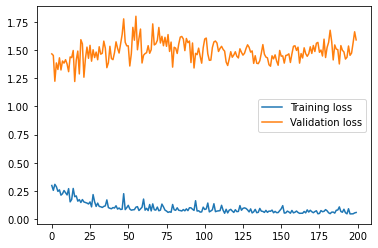

In [25]:
# fit the model
history = model.fit(trainX, trainY, epochs=200, batch_size=16, validation_split=0.20, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [26]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  

# from pandas.tseries.holiday import USFederalHolidayCalendar
# from pandas.tseries.offsets import CustomBusinessDay
# us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

#Remember that we can only predict 5 min in future as our model needs 6 variables
#as inputs for prediction. We only have all 6 variables until the last 5 min in our dataset.
n_past = 14 # past 15 days
n_days_for_prediction= 7 #  let us predict 30days including past 15 days and 15 days into future

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='D').tolist()
print(predict_period_dates)

[Timestamp('2021-11-08 00:00:00', freq='D'), Timestamp('2021-11-09 00:00:00', freq='D'), Timestamp('2021-11-10 00:00:00', freq='D'), Timestamp('2021-11-11 00:00:00', freq='D'), Timestamp('2021-11-12 00:00:00', freq='D'), Timestamp('2021-11-13 00:00:00', freq='D'), Timestamp('2021-11-14 00:00:00', freq='D')]


In [27]:
# trainX.shape

In [28]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [29]:
y_pred_future

array([ 0.02972956, -0.07428675, -0.0378779 ,  0.00919996,  0.00515365,
        0.00021612, -0.13238461], dtype=float32)

In [30]:
v_0 = df['LogRetBTC-USDClose'].values[-1:]
y_pred_future_log_diff = pd.DataFrame(y_pred_future)
y_pred_future_log_diff_rev = y_pred_future_log_diff.expanding(min_periods=0).sum() + v_0
y_pred_future_log_diff_rev

,0
0,0.000538
1,-0.073749
2,-0.111627
3,-0.102427
4,-0.097273
5,-0.097057
6,-0.229442


In [31]:
y_pred_future_log = y_pred_future_log_diff_rev[0].to_numpy()
y_pred_future_log

array([ 0.000538  , -0.07374875, -0.11162666, -0.1024267 , -0.09727304,
       -0.09705692, -0.22944154])

In [32]:
y_pred_future_org = np.exp(y_pred_future_log)
y_pred_future_org

array([1.00053814, 0.92890505, 0.89437811, 0.90264432, 0.90730824,
       0.90750435, 0.79497745])

C:\Users\jingc\AppData\Local\Temp/ipykernel_14908/1171569796.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['BTC-USDClose'])
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='BTC-USDClose'>

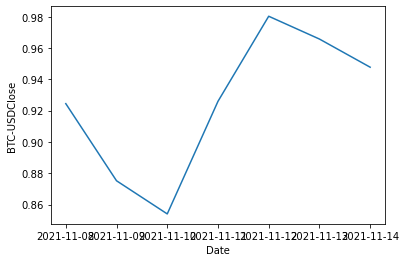

In [145]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'BTC-USDClose':y_pred_future_org})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'BTC-USDClose']]
original['Date']=pd.to_datetime(original['BTC-USDClose'])
original = original.loc[original['Date'] >= '2021-10-1']

sns.lineplot(original['Date'], original['BTC-USDClose'])
sns.lineplot(df_forecast['Date'], df_forecast['BTC-USDClose'])

In [142]:
# another way to set train val and test data
column_indices = {name: i for i, name in enumerate(df_for_training.columns)}

n = len(df_for_training)
df_train = df_for_training[0:int(n*0.7)]
df_val = df_for_training[int(n*0.7):int(n*0.9)]
df_test = df_for_training[int(n*0.9):]

num_features = df_for_training.shape[1]

sc= MinMaxScaler(feature_range = (0,1))

df_target=df_train[['High','Low','Open','Close']]
print(df_target.head())

KeyError: "None of [Index(['High', 'Low', 'Open', 'Close'], dtype='object')] are in the [columns]"

In [116]:
target_set = df_target.values
train_set = df_train.values

training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)

X_train = []
y_train = []
for i in range(50,len(train_set)):
    X_train.append(training_set_scaled[i-50:i,:])
    y_train.append(target_set_scaled[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(1774, 50, 212)
(1774, 4)


In [80]:
# # fit the model
# history = model.fit(trainX, trainY, epochs=2000, batch_size=16, validation_split=0.2, verbose=1)

# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.legend()


ValueError: The first argument to `Layer.call` must always be passed.

In [45]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  

# from pandas.tseries.holiday import USFederalHolidayCalendar
# from pandas.tseries.offsets import CustomBusinessDay
# us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 15
n_days_for_prediction=30 #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='1d').tolist()
print(predict_period_dates)


[Timestamp('2021-10-26 00:00:00', freq='D'), Timestamp('2021-10-27 00:00:00', freq='D'), Timestamp('2021-10-28 00:00:00', freq='D'), Timestamp('2021-10-29 00:00:00', freq='D'), Timestamp('2021-10-30 00:00:00', freq='D'), Timestamp('2021-10-31 00:00:00', freq='D'), Timestamp('2021-11-01 00:00:00', freq='D'), Timestamp('2021-11-02 00:00:00', freq='D'), Timestamp('2021-11-03 00:00:00', freq='D'), Timestamp('2021-11-04 00:00:00', freq='D'), Timestamp('2021-11-05 00:00:00', freq='D'), Timestamp('2021-11-06 00:00:00', freq='D'), Timestamp('2021-11-07 00:00:00', freq='D'), Timestamp('2021-11-08 00:00:00', freq='D'), Timestamp('2021-11-09 00:00:00', freq='D'), Timestamp('2021-11-10 00:00:00', freq='D'), Timestamp('2021-11-11 00:00:00', freq='D'), Timestamp('2021-11-12 00:00:00', freq='D'), Timestamp('2021-11-13 00:00:00', freq='D'), Timestamp('2021-11-14 00:00:00', freq='D'), Timestamp('2021-11-15 00:00:00', freq='D'), Timestamp('2021-11-16 00:00:00', freq='D'), Timestamp('2021-11-17 00:00:00'

In [46]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

C:\Users\jingc\AppData\Local\Temp/ipykernel_18476/2190141466.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

<AxesSubplot:xlabel='Date', ylabel='Open'>

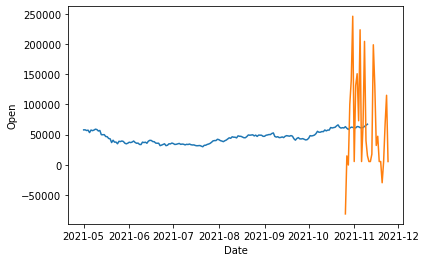

In [47]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2021-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

In [57]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=20)

In [58]:
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='test_reg_.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')
results=regressor.fit(X_train,y_train,callbacks=[callback])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                6816      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 1028      
Total params: 51,300
Trainable params: 51,300
Non-trainable params: 0
_________________________________________________________________


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

In [247]:
y_df = df[['Open','High', 'Low', 'Close']]
y = y_df.values
y_df

,Open,High,Low,Close
Datetime,,,,
2021-09-10 00:00:00+01:00,46514.476562,46528.984375,46488.984375,46528.984375
2021-09-10 00:05:00+01:00,46538.707031,46596.960938,46538.707031,46596.960938
2021-09-10 00:10:00+01:00,46600.589844,46626.742188,46578.835938,46626.742188
2021-09-10 00:15:00+01:00,46615.437500,46615.437500,46550.089844,46550.089844
2021-09-10 00:20:00+01:00,46557.332031,46560.378906,46542.398438,46560.378906
...,...,...,...,...
2021-11-08 10:45:00+00:00,65989.867188,65998.328125,65937.421875,65953.335938
2021-11-08 10:50:00+00:00,65948.195312,66012.484375,65948.195312,65987.601562
2021-11-08 10:55:00+00:00,66053.546875,66097.578125,65995.968750,66097.578125


In [248]:
X_df = df.drop(['High', 'Low', 'Open', 'Close'],axis =1)
X = X_df.values
X_df

,ETH-USDOpen,ETH-USDHigh,ETH-USDLow,ETH-USDClose,BNB-USDOpen,BNB-USDHigh,BNB-USDLow,BNB-USDClose,USDT-USDOpen,USDT-USDHigh,USDT-USDLow,USDT-USDClose,ADA-USDOpen,ADA-USDHigh,ADA-USDLow,ADA-USDClose,SOL1-USDOpen,SOL1-USDHigh,SOL1-USDLow,SOL1-USDClose,XRP-USDOpen,XRP-USDHigh,XRP-USDLow,XRP-USDClose,DOT1-USDOpen,DOT1-USDHigh,DOT1-USDLow,DOT1-USDClose,SHIB-USDOpen,SHIB-USDHigh,SHIB-USDLow,SHIB-USDClose,HEX-USDOpen,HEX-USDHigh,HEX-USDLow,HEX-USDClose,DOGE-USDOpen,DOGE-USDHigh,DOGE-USDLow,DOGE-USDClose,USDC-USDOpen,USDC-USDHigh,USDC-USDLow,USDC-USDClose,LUNA1-USDOpen,LUNA1-USDHigh,LUNA1-USDLow,LUNA1-USDClose,UNI3-USDOpen,UNI3-USDHigh,UNI3-USDLow,UNI3-USDClose,AVAX-USDOpen,AVAX-USDHigh,AVAX-USDLow,AVAX-USDClose,LINK-USDOpen,LINK-USDHigh,LINK-USDLow,LINK-USDClose,LTC-USDOpen,LTC-USDHigh,LTC-USDLow,LTC-USDClose,MATIC-USDOpen,MATIC-USDHigh,MATIC-USDLow,MATIC-USDClose,ALGO-USDOpen,ALGO-USDHigh,ALGO-USDLow,ALGO-USDClose,XMR-USDOpen,XMR-USDHigh,XMR-USDLow,XMR-USDClose,CRO-USDOpen,CRO-USDHigh,CRO-USDLow,CRO-USDClose,RVN-USDOpen,RVN-USDHigh,RVN-USDLow,RVN-USDClose,BCH-USDOpen,BCH-USDHigh,BCH-USDLow,BCH-USDClose,VET-USDOpen,VET-USDHigh,VET-USDLow,VET-USDClose,ICP1-USDOpen,ICP1-USDHigh,ICP1-USDLow,ICP1-USDClose,XLM-USDOpen,XLM-USDHigh,XLM-USDLow,XLM-USDClose,ATOM1-USDOpen,ATOM1-USDHigh,ATOM1-USDLow,ATOM1-USDClose,FIL-USDOpen,FIL-USDHigh,FIL-USDLow,FIL-USDClose,TRX-USDOpen,TRX-USDHigh,TRX-USDLow,TRX-USDClose,THETA-USDOpen,THETA-USDHigh,THETA-USDLow,THETA-USDClose,ETC-USDOpen,ETC-USDHigh,ETC-USDLow,ETC-USDClose,HBAR-USDOpen,HBAR-USDHigh,HBAR-USDLow,HBAR-USDClose,EGLD-USDOpen,EGLD-USDHigh,EGLD-USDLow,EGLD-USDClose,XTZ-USDOpen,XTZ-USDHigh,XTZ-USDLow,XTZ-USDClose,GRT2-USDOpen,GRT2-USDHigh,GRT2-USDLow,GRT2-USDClose,MANA-USDOpen,MANA-USDHigh,MANA-USDLow,MANA-USDClose,EOS-USDOpen,EOS-USDHigh,EOS-USDLow,EOS-USDClose,HNT1-USDOpen,HNT1-USDHigh,HNT1-USDLow,HNT1-USDClose,AAVE-USDOpen,AAVE-USDHigh,AAVE-USDLow,AAVE-USDClose,CELR-USDOpen,CELR-USDHigh,CELR-USDLow,CELR-USDClose,AXS-USDOpen,AXS-USDHigh,AXS-USDLow,AXS-USDClose,FTT1-USDOpen,FTT1-USDHigh,FTT1-USDLow,FTT1-USDClose,FTM-USDOpen,FTM-USDHigh,FTM-USDLow,FTM-USDClose,DAI1-USDOpen,DAI1-USDHigh,DAI1-USDLow,DAI1-USDClose,CAKE-USDOpen,CAKE-USDHigh,CAKE-USDLow,CAKE-USDClose,FLOW1-USDOpen,FLOW1-USDHigh,FLOW1-USDLow,FLOW1-USDClose,SMA1h,SMA6h,SMA1d,SMA7d,Signal_LT,Signal_ST,Entry/Exit,day sin,day cos,week sin,week cos,candle_wick,candle_body,candle_shape,candle_color
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-10 00:00:00+01:00,3449.537598,3457.268311,3448.301514,3457.268311,422.671783,423.319092,422.213470,423.319092,1.000160,1.000291,1.000130,1.000130,2.521725,2.524140,2.520109,2.524140,191.302673,193.056778,191.302673,192.335480,1.099431,1.099431,1.097388,1.098778,30.058964,30.121416,29.993059,30.121416,0.000007,0.000007,0.000007,0.000007,0.469817,0.469817,0.468695,0.469070,0.253283,0.253878,0.253217,0.253878,1.000104,1.000157,1.000063,1.000157,30.199965,30.199965,30.124102,30.170521,23.378481,23.499973,23.378481,23.499973,41.100533,41.115643,41.004608,41.115643,28.259499,28.360777,28.241430,28.360777,181.325867,181.429398,181.185883,181.429398,1.371378,1.374438,1.371378,1.374438,2.249693,2.249693,2.228112,2.233657,262.188690,263.317841,262.188690,263.317841,0.181140,0.181293,0.181137,0.181293,0.119561,0.119665,0.119426,0.119665,662.897217,663.289429,662.771912,663.289429,0.121917,0.121934,0.121691,0.121934,61.083637,61.083637,60.860027,60.958424,0.334866,0.334866,0.334356,0.334859,25.943851,26.144190,25.943851,26.144190,89.626404,89.771614,89.563271,89.771614,0.092720,0.092720,0.092508,0.092668,7.022638,7.025548,7.014469,7.025548,59.038307,59.084702,59.009968,59.084702,0.334306,0.336021,0.334306,0.336021,202.109741,203.115158,201.689789,203.115158,5.618011,5.634667,5.558570,5.558570,0.860417,0.862278,0.859073,0.862278,0.871345,0.872427,0.871291

In [249]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
ETH-USDOpen     float64
                 ...   
week cos        float64
candle_wick     float64
candle_body     float64
candle_shape    float64
candle_color      int32
Length: 199, dtype: object

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Regressor model

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 195, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

In [55]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=2000)

In [256]:
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')
results=regressor.fit(X_train,y_train,callbacks=[callback])


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 32)                6272      
_________________________________________________________________
dense_83 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_84 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_85 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_86 (Dense)             (None, 4)                 1028      
Total params: 50,756
Trainable params: 50,756
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
750/750 [==============================] - 1s 712us/step - loss: 2576.8940 - accuracy: 0.3102 - mean_a

Epoch 111/2000
750/750 [==============================] - 1s 720us/step - loss: 225.3169 - accuracy: 0.4628 - mean_absolute_error: 225.3169
Epoch 112/2000
750/750 [==============================] - 1s 717us/step - loss: 245.0195 - accuracy: 0.4159 - mean_absolute_error: 245.0195
Epoch 113/2000
750/750 [==============================] - 1s 720us/step - loss: 277.7334 - accuracy: 0.4279 - mean_absolute_error: 277.7334
Epoch 114/2000
750/750 [==============================] - 1s 714us/step - loss: 261.6496 - accuracy: 0.4221 - mean_absolute_error: 261.6496
Epoch 115/2000
750/750 [==============================] - 1s 718us/step - loss: 221.1141 - accuracy: 0.4572 - mean_absolute_error: 221.1141
Epoch 116/2000
750/750 [==============================] - 1s 748us/step - loss: 220.1597 - accuracy: 0.4129 - mean_absolute_error: 220.1597
Epoch 117/2000
750/750 [==============================] - 1s 745us/step - loss: 209.7583 - accuracy: 0.4291 - mean_absolute_error: 209.7583
Epoch 118/2000
750/7

750/750 [==============================] - 1s 720us/step - loss: 184.1148 - accuracy: 0.4691 - mean_absolute_error: 184.1148
Epoch 228/2000
750/750 [==============================] - 1s 714us/step - loss: 206.2744 - accuracy: 0.4675 - mean_absolute_error: 206.2744
Epoch 229/2000
750/750 [==============================] - 1s 724us/step - loss: 195.5502 - accuracy: 0.4711 - mean_absolute_error: 195.5502
Epoch 230/2000
750/750 [==============================] - 1s 716us/step - loss: 207.1463 - accuracy: 0.4916 - mean_absolute_error: 207.1463
Epoch 231/2000
750/750 [==============================] - 1s 720us/step - loss: 217.3524 - accuracy: 0.4801 - mean_absolute_error: 217.3524
Epoch 232/2000
750/750 [==============================] - 1s 725us/step - loss: 222.5565 - accuracy: 0.4782 - mean_absolute_error: 222.5565
Epoch 233/2000
750/750 [==============================] - 1s 712us/step - loss: 209.9060 - accuracy: 0.5038 - mean_absolute_error: 209.9060
Epoch 234/2000
750/750 [===========

750/750 [==============================] - 1s 722us/step - loss: 184.4672 - accuracy: 0.5148 - mean_absolute_error: 184.4672
Epoch 344/2000
750/750 [==============================] - 1s 713us/step - loss: 181.0785 - accuracy: 0.5048 - mean_absolute_error: 181.0785
Epoch 345/2000
750/750 [==============================] - 1s 721us/step - loss: 191.3915 - accuracy: 0.4769 - mean_absolute_error: 191.3915
Epoch 346/2000
750/750 [==============================] - 1s 717us/step - loss: 184.8609 - accuracy: 0.5238 - mean_absolute_error: 184.8609
Epoch 347/2000
750/750 [==============================] - 1s 718us/step - loss: 192.9465 - accuracy: 0.5131 - mean_absolute_error: 192.9465
Epoch 348/2000
750/750 [==============================] - 1s 716us/step - loss: 186.7006 - accuracy: 0.5130 - mean_absolute_error: 186.7006
Epoch 349/2000
750/750 [==============================] - 1s 720us/step - loss: 184.6498 - accuracy: 0.5307 - mean_absolute_error: 184.6498
Epoch 350/2000
750/750 [===========

750/750 [==============================] - 1s 706us/step - loss: 176.0459 - accuracy: 0.5289 - mean_absolute_error: 176.0459
Epoch 460/2000
750/750 [==============================] - 1s 709us/step - loss: 190.2003 - accuracy: 0.5400 - mean_absolute_error: 190.2003
Epoch 461/2000
750/750 [==============================] - 1s 706us/step - loss: 173.1173 - accuracy: 0.5281 - mean_absolute_error: 173.1173
Epoch 462/2000
750/750 [==============================] - 1s 706us/step - loss: 169.7718 - accuracy: 0.4895 - mean_absolute_error: 169.7718
Epoch 463/2000
750/750 [==============================] - 1s 733us/step - loss: 170.1326 - accuracy: 0.5234 - mean_absolute_error: 170.1326
Epoch 464/2000
750/750 [==============================] - 1s 710us/step - loss: 177.2822 - accuracy: 0.4676 - mean_absolute_error: 177.2822
Epoch 465/2000
750/750 [==============================] - 1s 718us/step - loss: 174.8492 - accuracy: 0.5178 - mean_absolute_error: 174.8492
Epoch 466/2000
750/750 [===========

750/750 [==============================] - 1s 722us/step - loss: 170.0296 - accuracy: 0.5254 - mean_absolute_error: 170.0296
Epoch 576/2000
750/750 [==============================] - 1s 714us/step - loss: 176.8320 - accuracy: 0.5369 - mean_absolute_error: 176.8320
Epoch 577/2000
750/750 [==============================] - 1s 718us/step - loss: 176.7409 - accuracy: 0.5120 - mean_absolute_error: 176.7409
Epoch 578/2000
750/750 [==============================] - 1s 720us/step - loss: 194.8450 - accuracy: 0.5402 - mean_absolute_error: 194.8450
Epoch 579/2000
750/750 [==============================] - 1s 717us/step - loss: 167.6026 - accuracy: 0.5559 - mean_absolute_error: 167.6026
Epoch 580/2000
750/750 [==============================] - 1s 726us/step - loss: 169.9873 - accuracy: 0.5057 - mean_absolute_error: 169.9873
Epoch 581/2000
750/750 [==============================] - 1s 724us/step - loss: 198.7499 - accuracy: 0.4977 - mean_absolute_error: 198.7499
Epoch 582/2000
750/750 [===========

750/750 [==============================] - 1s 717us/step - loss: 171.5587 - accuracy: 0.5260 - mean_absolute_error: 171.5587
Epoch 692/2000
750/750 [==============================] - 1s 722us/step - loss: 168.4889 - accuracy: 0.5811 - mean_absolute_error: 168.4889
Epoch 693/2000
750/750 [==============================] - 1s 718us/step - loss: 178.0198 - accuracy: 0.5405 - mean_absolute_error: 178.0198
Epoch 694/2000
750/750 [==============================] - 1s 717us/step - loss: 160.9048 - accuracy: 0.5333 - mean_absolute_error: 160.9048
Epoch 695/2000
750/750 [==============================] - 1s 728us/step - loss: 163.3253 - accuracy: 0.5122 - mean_absolute_error: 163.3253
Epoch 696/2000
750/750 [==============================] - 1s 716us/step - loss: 176.1641 - accuracy: 0.5255 - mean_absolute_error: 176.1641
Epoch 697/2000
750/750 [==============================] - 1s 716us/step - loss: 156.6502 - accuracy: 0.5156 - mean_absolute_error: 156.6502
Epoch 698/2000
750/750 [===========

750/750 [==============================] - 1s 716us/step - loss: 157.7937 - accuracy: 0.5504 - mean_absolute_error: 157.7937
Epoch 808/2000
750/750 [==============================] - 1s 720us/step - loss: 160.1580 - accuracy: 0.5147 - mean_absolute_error: 160.1580
Epoch 809/2000
750/750 [==============================] - 1s 717us/step - loss: 170.2141 - accuracy: 0.5562 - mean_absolute_error: 170.2141
Epoch 810/2000
750/750 [==============================] - 1s 716us/step - loss: 161.2454 - accuracy: 0.5576 - mean_absolute_error: 161.2454
Epoch 811/2000
750/750 [==============================] - 1s 744us/step - loss: 173.0710 - accuracy: 0.5630 - mean_absolute_error: 173.0710
Epoch 812/2000
750/750 [==============================] - 1s 714us/step - loss: 162.5635 - accuracy: 0.5793 - mean_absolute_error: 162.5635
Epoch 813/2000
750/750 [==============================] - 1s 722us/step - loss: 172.0890 - accuracy: 0.5516 - mean_absolute_error: 172.0890
Epoch 814/2000
750/750 [===========

750/750 [==============================] - 1s 702us/step - loss: 163.0480 - accuracy: 0.5642 - mean_absolute_error: 163.0480
Epoch 924/2000
750/750 [==============================] - 1s 712us/step - loss: 156.8657 - accuracy: 0.5507 - mean_absolute_error: 156.8657
Epoch 925/2000
750/750 [==============================] - 1s 710us/step - loss: 160.2696 - accuracy: 0.5894 - mean_absolute_error: 160.2696
Epoch 926/2000
750/750 [==============================] - 1s 712us/step - loss: 171.4908 - accuracy: 0.5577 - mean_absolute_error: 171.4908
Epoch 927/2000
750/750 [==============================] - 1s 704us/step - loss: 161.5020 - accuracy: 0.5777 - mean_absolute_error: 161.5020
Epoch 928/2000
750/750 [==============================] - 1s 713us/step - loss: 164.5345 - accuracy: 0.5766 - mean_absolute_error: 164.5345
Epoch 929/2000
750/750 [==============================] - 1s 706us/step - loss: 161.1914 - accuracy: 0.5607 - mean_absolute_error: 161.1914
Epoch 930/2000
750/750 [===========

750/750 [==============================] - 1s 706us/step - loss: 161.3579 - accuracy: 0.5279 - mean_absolute_error: 161.3579
Epoch 1040/2000
750/750 [==============================] - 1s 706us/step - loss: 157.8064 - accuracy: 0.5585 - mean_absolute_error: 157.8064
Epoch 1041/2000
750/750 [==============================] - 1s 705us/step - loss: 164.2119 - accuracy: 0.5718 - mean_absolute_error: 164.2119
Epoch 1042/2000
750/750 [==============================] - 1s 706us/step - loss: 163.8441 - accuracy: 0.5574 - mean_absolute_error: 163.8441
Epoch 1043/2000
750/750 [==============================] - 1s 706us/step - loss: 161.2949 - accuracy: 0.5630 - mean_absolute_error: 161.2949
Epoch 1044/2000
750/750 [==============================] - 1s 714us/step - loss: 159.4116 - accuracy: 0.5872 - mean_absolute_error: 159.4116
Epoch 1045/2000
750/750 [==============================] - 1s 708us/step - loss: 155.7313 - accuracy: 0.5753 - mean_absolute_error: 155.7313
Epoch 1046/2000
750/750 [====

750/750 [==============================] - 1s 717us/step - loss: 163.3374 - accuracy: 0.5565 - mean_absolute_error: 163.3374
Epoch 1156/2000
750/750 [==============================] - 1s 717us/step - loss: 162.5550 - accuracy: 0.6057 - mean_absolute_error: 162.5550
Epoch 1157/2000
750/750 [==============================] - 1s 704us/step - loss: 151.6776 - accuracy: 0.5735 - mean_absolute_error: 151.6776
Epoch 1158/2000
750/750 [==============================] - 1s 713us/step - loss: 154.2861 - accuracy: 0.5740 - mean_absolute_error: 154.2861
Epoch 1159/2000
750/750 [==============================] - 1s 713us/step - loss: 160.2668 - accuracy: 0.5853 - mean_absolute_error: 160.2668
Epoch 1160/2000
750/750 [==============================] - 1s 712us/step - loss: 163.2491 - accuracy: 0.5933 - mean_absolute_error: 163.2491
Epoch 1161/2000
750/750 [==============================] - 1s 712us/step - loss: 145.1159 - accuracy: 0.5516 - mean_absolute_error: 145.1159
Epoch 1162/2000
750/750 [====

750/750 [==============================] - 1s 720us/step - loss: 147.0405 - accuracy: 0.5742 - mean_absolute_error: 147.0405
Epoch 1272/2000
750/750 [==============================] - 1s 709us/step - loss: 151.6673 - accuracy: 0.5442 - mean_absolute_error: 151.6673
Epoch 1273/2000
750/750 [==============================] - 1s 714us/step - loss: 155.0980 - accuracy: 0.5994 - mean_absolute_error: 155.0980
Epoch 1274/2000
750/750 [==============================] - 1s 709us/step - loss: 152.5274 - accuracy: 0.5847 - mean_absolute_error: 152.5274
Epoch 1275/2000
750/750 [==============================] - 1s 716us/step - loss: 159.9075 - accuracy: 0.5479 - mean_absolute_error: 159.9075
Epoch 1276/2000
750/750 [==============================] - 1s 712us/step - loss: 151.7027 - accuracy: 0.5571 - mean_absolute_error: 151.7027
Epoch 1277/2000
750/750 [==============================] - 1s 717us/step - loss: 155.0624 - accuracy: 0.5515 - mean_absolute_error: 155.0624
Epoch 1278/2000
750/750 [====

750/750 [==============================] - 1s 718us/step - loss: 158.1819 - accuracy: 0.5851 - mean_absolute_error: 158.1819
Epoch 1388/2000
750/750 [==============================] - 1s 713us/step - loss: 152.2431 - accuracy: 0.5680 - mean_absolute_error: 152.2431
Epoch 1389/2000
750/750 [==============================] - 1s 713us/step - loss: 148.9539 - accuracy: 0.5732 - mean_absolute_error: 148.9539
Epoch 1390/2000
750/750 [==============================] - 1s 709us/step - loss: 156.7043 - accuracy: 0.5981 - mean_absolute_error: 156.7043
Epoch 1391/2000
750/750 [==============================] - 1s 722us/step - loss: 152.5522 - accuracy: 0.5774 - mean_absolute_error: 152.5522
Epoch 1392/2000
750/750 [==============================] - 1s 713us/step - loss: 147.4438 - accuracy: 0.5736 - mean_absolute_error: 147.4438
Epoch 1393/2000
750/750 [==============================] - 1s 716us/step - loss: 158.6050 - accuracy: 0.5700 - mean_absolute_error: 158.6050
Epoch 1394/2000
750/750 [====

750/750 [==============================] - 1s 704us/step - loss: 159.1918 - accuracy: 0.5861 - mean_absolute_error: 159.1918
Epoch 1504/2000
750/750 [==============================] - 1s 704us/step - loss: 143.2088 - accuracy: 0.5840 - mean_absolute_error: 143.2088
Epoch 1505/2000
750/750 [==============================] - 1s 704us/step - loss: 145.7576 - accuracy: 0.5877 - mean_absolute_error: 145.7576
Epoch 1506/2000
750/750 [==============================] - 1s 700us/step - loss: 158.6056 - accuracy: 0.6093 - mean_absolute_error: 158.6056
Epoch 1507/2000
750/750 [==============================] - 1s 710us/step - loss: 153.2657 - accuracy: 0.6017 - mean_absolute_error: 153.2657
Epoch 1508/2000
750/750 [==============================] - 1s 712us/step - loss: 155.0075 - accuracy: 0.5926 - mean_absolute_error: 155.0075
Epoch 1509/2000
750/750 [==============================] - 1s 710us/step - loss: 148.8521 - accuracy: 0.5625 - mean_absolute_error: 148.8521
Epoch 1510/2000
750/750 [====

750/750 [==============================] - 1s 712us/step - loss: 150.5467 - accuracy: 0.5671 - mean_absolute_error: 150.5467
Epoch 1620/2000
750/750 [==============================] - 1s 714us/step - loss: 150.3035 - accuracy: 0.5826 - mean_absolute_error: 150.3035
Epoch 1621/2000
750/750 [==============================] - 1s 708us/step - loss: 158.9564 - accuracy: 0.5705 - mean_absolute_error: 158.9564
Epoch 1622/2000
750/750 [==============================] - 1s 713us/step - loss: 150.5058 - accuracy: 0.6091 - mean_absolute_error: 150.5058
Epoch 1623/2000
750/750 [==============================] - 1s 708us/step - loss: 150.5124 - accuracy: 0.5726 - mean_absolute_error: 150.5124
Epoch 1624/2000
750/750 [==============================] - 1s 714us/step - loss: 144.2582 - accuracy: 0.5866 - mean_absolute_error: 144.2582
Epoch 1625/2000
750/750 [==============================] - 1s 709us/step - loss: 154.4019 - accuracy: 0.5468 - mean_absolute_error: 154.4019
Epoch 1626/2000
750/750 [====

750/750 [==============================] - 1s 721us/step - loss: 146.9206 - accuracy: 0.5551 - mean_absolute_error: 146.9206
Epoch 1736/2000
750/750 [==============================] - 1s 714us/step - loss: 151.7470 - accuracy: 0.5725 - mean_absolute_error: 151.7470
Epoch 1737/2000
750/750 [==============================] - 1s 720us/step - loss: 148.8992 - accuracy: 0.5799 - mean_absolute_error: 148.8992
Epoch 1738/2000
750/750 [==============================] - 1s 718us/step - loss: 148.5235 - accuracy: 0.6050 - mean_absolute_error: 148.5235
Epoch 1739/2000
750/750 [==============================] - 1s 725us/step - loss: 149.9119 - accuracy: 0.5607 - mean_absolute_error: 149.9119
Epoch 1740/2000
750/750 [==============================] - 1s 713us/step - loss: 155.6356 - accuracy: 0.6016 - mean_absolute_error: 155.6356
Epoch 1741/2000
750/750 [==============================] - 1s 722us/step - loss: 148.4369 - accuracy: 0.5901 - mean_absolute_error: 148.4369
Epoch 1742/2000
750/750 [====

750/750 [==============================] - 1s 713us/step - loss: 141.5483 - accuracy: 0.6017 - mean_absolute_error: 141.5483
Epoch 1852/2000
750/750 [==============================] - 1s 725us/step - loss: 144.3249 - accuracy: 0.5831 - mean_absolute_error: 144.3249
Epoch 1853/2000
750/750 [==============================] - 1s 713us/step - loss: 153.8520 - accuracy: 0.6114 - mean_absolute_error: 153.8520
Epoch 1854/2000
750/750 [==============================] - 1s 726us/step - loss: 146.8934 - accuracy: 0.6056 - mean_absolute_error: 146.8934
Epoch 1855/2000
750/750 [==============================] - 1s 716us/step - loss: 152.2194 - accuracy: 0.5617 - mean_absolute_error: 152.2194
Epoch 1856/2000
750/750 [==============================] - 1s 717us/step - loss: 146.8456 - accuracy: 0.6093 - mean_absolute_error: 146.8456
Epoch 1857/2000
750/750 [==============================] - 1s 720us/step - loss: 148.3405 - accuracy: 0.5793 - mean_absolute_error: 148.3405
Epoch 1858/2000
750/750 [====

750/750 [==============================] - 1s 718us/step - loss: 150.0202 - accuracy: 0.5704 - mean_absolute_error: 150.0202
Epoch 1968/2000
750/750 [==============================] - 1s 717us/step - loss: 147.8885 - accuracy: 0.5943 - mean_absolute_error: 147.8885
Epoch 1969/2000
750/750 [==============================] - 1s 720us/step - loss: 150.4388 - accuracy: 0.5981 - mean_absolute_error: 150.4388
Epoch 1970/2000
750/750 [==============================] - 1s 725us/step - loss: 144.5890 - accuracy: 0.5985 - mean_absolute_error: 144.5890
Epoch 1971/2000
750/750 [==============================] - 1s 717us/step - loss: 145.1058 - accuracy: 0.5779 - mean_absolute_error: 145.1058
Epoch 1972/2000
750/750 [==============================] - 1s 721us/step - loss: 143.2344 - accuracy: 0.5985 - mean_absolute_error: 143.2344
Epoch 1973/2000
750/750 [==============================] - 1s 716us/step - loss: 147.9538 - accuracy: 0.5889 - mean_absolute_error: 147.9538
Epoch 1974/2000
750/750 [====

In [257]:
y_pred= regressor.predict(X_test)

In [258]:
print(y_pred)

[[54586.54  54699.2   54519.93  54655.98 ]
 [61136.668 61262.637 61062.47  61214.566]
 [47195.098 47292.74  47137.055 47255.004]
 ...
 [61178.836 61304.895 61104.59  61256.785]
 [45075.344 45168.68  45019.754 45132.516]
 [54924.176 55037.523 54857.17  54994.055]]


In [259]:
print(y_test)

[[54811.5625     54811.5625     54775.8359375  54800.12109375]
 [61206.69921875 61245.67578125 61206.69921875 61215.12890625]
 [47391.88671875 47391.88671875 47365.92578125 47365.92578125]
 ...
 [61278.8203125  61311.09765625 61278.8203125  61306.10546875]
 [45150.34375    45150.34375    45018.234375   45018.234375  ]
 [54968.62890625 55037.51953125 54946.30078125 55037.51953125]]


In [260]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,4):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(y_test[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))

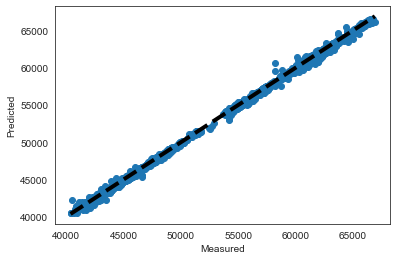

In [261]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

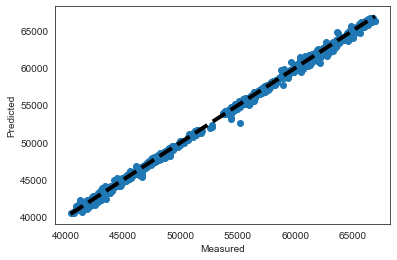

In [262]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

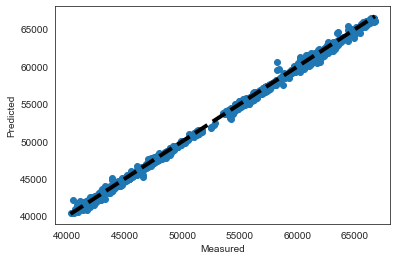

In [263]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[2], y_pred_mod[2])
ax.plot([y_test_mod[2].min(),y_test_mod[2].max()], [y_test_mod[2].min(), y_test_mod[2].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

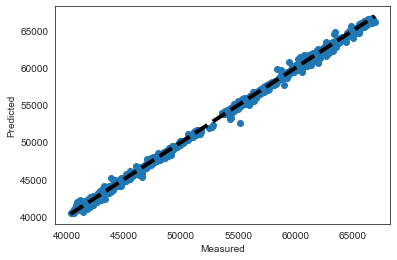

In [264]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[3], y_pred_mod[3])
ax.plot([y_test_mod[3].min(),y_test_mod[3].max()], [y_test_mod[3].min(), y_test_mod[3].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [279]:
# df_y_pred = pd.DataFrame(y_pred, columns = ['Open','High', 'Low', 'Close'])
# df_y_test = pd.DataFrame(y_test, columns = ['Open','High', 'Low', 'Close'])


In [1]:
# import plotly.graph_objects as go
# import pandas as pd
# from datetime import datetime

# # fig = go.Figure(data=[go.Candlestick(x=df.index,
# #                 open=df['Open'],
# #                 high=df['High'],
# #                 low=df['Low'],
# #                 close=df['Close'])])

# fig = go.Figure(data=[go.Candlestick(x=df_y_pred.index,
#                 open=df_y_pred['Open'],
#                 high=df_y_pred['High'],
#                 low=df_y_pred['Low'],
#                 close=df_y_pred['Close'])])


# #ax.fill_between(df.index, df['lower_band'], df['upper_band'], color='#ADCCFF', alpha=0.4)

# fig.show()

NameError: name 'df_y_pred' is not defined

#### RNN model

In [3]:
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [6]:
df.head(1)

,Open,High,Low,Close,Volume,ETH-USDOpen,ETH-USDHigh,ETH-USDLow,ETH-USDClose,BNB-USDOpen,...,day sin,day cos,week sin,week cos,Increase_in_vol,Increase_in_adj_close,candle_wick,candle_body,candle_shape,candle_color
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-09-10 00:00:00+01:00,46514.476562,46528.984375,46488.984375,46528.984375,3694592,3449.537598,3457.268311,3448.301514,3457.268311,422.671783,...,-0.258819,0.965926,0.757972,0.652287,0.0,0.0,40.0,14.507812,-12.746094,0


In [24]:
df1 = df[['Open','High','Low','Close','Volume', 'day sin','day cos', 'week sin','week cos', 'Increase_in_vol',
         'Increase_in_adj_close','candle_wick','candle_body', 'candle_shape','candle_color']]

In [25]:
column_indices = {name: i for i, name in enumerate(df1.columns)}

n = len(df1)
df_train = df1[0:int(n*0.7)]
df_val = df1[int(n*0.7):int(n*0.9)]
df_test = df1[int(n*0.9):]

num_features = df1.shape[1]

In [26]:
sc= MinMaxScaler(feature_range = (0,1))

In [27]:
df_target=df_train[['High','Low','Open','Close']]
print(df_target.head())

                                   High           Low          Open  \
Datetime                                                              
2021-09-10 00:00:00+01:00  46528.984375  46488.984375  46514.476562   
2021-09-10 00:05:00+01:00  46596.960938  46538.707031  46538.707031   
2021-09-10 00:10:00+01:00  46626.742188  46578.835938  46600.589844   
2021-09-10 00:15:00+01:00  46615.437500  46550.089844  46615.437500   
2021-09-10 00:20:00+01:00  46560.378906  46542.398438  46557.332031   

                                  Close  
Datetime                                 
2021-09-10 00:00:00+01:00  46528.984375  
2021-09-10 00:05:00+01:00  46596.960938  
2021-09-10 00:10:00+01:00  46626.742188  
2021-09-10 00:15:00+01:00  46550.089844  
2021-09-10 00:20:00+01:00  46560.378906  


In [28]:
target_set = df_target.values
train_set = df_train.values

In [29]:
training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)

In [30]:
X_train = []
y_train = []
for i in range(50,len(train_set)):
    X_train.append(training_set_scaled[i-50:i,:])
    y_train.append(target_set_scaled[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)


In [31]:
print(X_train.shape)
print(y_train.shape)

(12043, 50, 15)
(12043, 4)


In [32]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
def model():
    mod=Sequential()
    mod.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 15)))
    mod.add(Dropout(0.2))
    mod.add(BatchNormalization())
    mod.add(LSTM(units = 64, return_sequences = True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
   
    mod.add((LSTM(units = 64)))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 16, activation='tanh')))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 4, activation='tanh')))
    mod.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mean_squared_error'])
    mod.summary()
    
    return mod

In [33]:
RNN_model=model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50, 64)            20480     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 50, 64)            256       
_________________________________________________________________
lstm_7 (LSTM)                (None, 50, 64)            33024     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 50, 64)            256       
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)               

In [34]:
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='./RNN_model.h5',
                                           monitor='mean_squared_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto',
                                           save_freq='epoch')
RNN_model.fit(X_train, y_train, epochs = 2000, batch_size = 32,callbacks=[callback])

Epoch 1/2000
377/377 [==============================] - 18s 41ms/step - loss: 0.0678 - accuracy: 0.2352 - mean_squared_error: 0.0678
Epoch 2/2000
377/377 [==============================] - 15s 41ms/step - loss: 0.0099 - accuracy: 0.2723 - mean_squared_error: 0.0099
Epoch 3/2000
377/377 [==============================] - 15s 40ms/step - loss: 0.0070 - accuracy: 0.3047 - mean_squared_error: 0.0070
Epoch 4/2000
377/377 [==============================] - 15s 40ms/step - loss: 0.0063 - accuracy: 0.3007 - mean_squared_error: 0.0063
Epoch 5/2000
377/377 [==============================] - 15s 40ms/step - loss: 0.0064 - accuracy: 0.2821 - mean_squared_error: 0.0064
Epoch 6/2000
377/377 [==============================] - 15s 40ms/step - loss: 0.0062 - accuracy: 0.2670 - mean_squared_error: 0.0062
Epoch 7/2000
377/377 [==============================] - 15s 41ms/step - loss: 0.0051 - accuracy: 0.3094 - mean_squared_error: 0.0051
Epoch 8/2000
377/377 [==============================] - 15s 40ms/step

377/377 [==============================] - 15s 41ms/step - loss: 9.1347e-04 - accuracy: 0.4980 - mean_squared_error: 9.1347e-04
Epoch 122/2000
377/377 [==============================] - 15s 40ms/step - loss: 8.0972e-04 - accuracy: 0.4903 - mean_squared_error: 8.0972e-04
Epoch 123/2000
377/377 [==============================] - 15s 41ms/step - loss: 7.9549e-04 - accuracy: 0.5018 - mean_squared_error: 7.9549e-04
Epoch 124/2000
377/377 [==============================] - 15s 40ms/step - loss: 9.2523e-04 - accuracy: 0.4868 - mean_squared_error: 9.2523e-04
Epoch 125/2000
377/377 [==============================] - 15s 40ms/step - loss: 9.7618e-04 - accuracy: 0.4968 - mean_squared_error: 9.7618e-04
Epoch 126/2000
377/377 [==============================] - 15s 40ms/step - loss: 9.1926e-04 - accuracy: 0.5057 - mean_squared_error: 9.1926e-04
Epoch 127/2000
377/377 [==============================] - 15s 40ms/step - loss: 9.0262e-04 - accuracy: 0.5001 - mean_squared_error: 9.0262e-04
Epoch 128/2000

377/377 [==============================] - 15s 41ms/step - loss: 6.7408e-04 - accuracy: 0.5783 - mean_squared_error: 6.7408e-04
Epoch 236/2000
377/377 [==============================] - 15s 41ms/step - loss: 7.1699e-04 - accuracy: 0.5751 - mean_squared_error: 7.1699e-04
Epoch 237/2000
377/377 [==============================] - 16s 41ms/step - loss: 5.6879e-04 - accuracy: 0.5820 - mean_squared_error: 5.6879e-04
Epoch 238/2000
377/377 [==============================] - 15s 41ms/step - loss: 7.3103e-04 - accuracy: 0.5727 - mean_squared_error: 7.3103e-04
Epoch 239/2000
377/377 [==============================] - 15s 41ms/step - loss: 7.4840e-04 - accuracy: 0.5568 - mean_squared_error: 7.4840e-04
Epoch 240/2000
377/377 [==============================] - 15s 41ms/step - loss: 6.0047e-04 - accuracy: 0.5865 - mean_squared_error: 6.0047e-04
Epoch 241/2000
377/377 [==============================] - 15s 40ms/step - loss: 8.1688e-04 - accuracy: 0.5639 - mean_squared_error: 8.1688e-04
Epoch 242/2000

377/377 [==============================] - 16s 42ms/step - loss: 6.0366e-04 - accuracy: 0.5948 - mean_squared_error: 6.0366e-04
Epoch 350/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.6730e-04 - accuracy: 0.5876 - mean_squared_error: 6.6730e-04
Epoch 351/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.9401e-04 - accuracy: 0.5865 - mean_squared_error: 5.9401e-04
Epoch 352/2000
377/377 [==============================] - 16s 41ms/step - loss: 6.3062e-04 - accuracy: 0.5896 - mean_squared_error: 6.3062e-04
Epoch 353/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.1276e-04 - accuracy: 0.5968 - mean_squared_error: 6.1276e-04
Epoch 354/2000
377/377 [==============================] - 16s 41ms/step - loss: 6.6333e-04 - accuracy: 0.5850 - mean_squared_error: 6.6333e-04
Epoch 355/2000
377/377 [==============================] - 16s 41ms/step - loss: 6.6701e-04 - accuracy: 0.5867 - mean_squared_error: 6.6701e-04
Epoch 356/2000

377/377 [==============================] - 16s 42ms/step - loss: 5.6563e-04 - accuracy: 0.5895 - mean_squared_error: 5.6563e-04
Epoch 464/2000
377/377 [==============================] - 16s 41ms/step - loss: 6.1192e-04 - accuracy: 0.5866 - mean_squared_error: 6.1192e-04
Epoch 465/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.7578e-04 - accuracy: 0.5799 - mean_squared_error: 6.7578e-04
Epoch 466/2000
377/377 [==============================] - 16s 41ms/step - loss: 4.8656e-04 - accuracy: 0.5842 - mean_squared_error: 4.8656e-04
Epoch 467/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.5897e-04 - accuracy: 0.5911 - mean_squared_error: 5.5897e-04
Epoch 468/2000
377/377 [==============================] - 16s 41ms/step - loss: 7.7401e-04 - accuracy: 0.5690 - mean_squared_error: 7.7401e-04
Epoch 469/2000
377/377 [==============================] - 16s 43ms/step - loss: 6.2493e-04 - accuracy: 0.5849 - mean_squared_error: 6.2493e-04
Epoch 470/2000

377/377 [==============================] - 16s 42ms/step - loss: 6.0427e-04 - accuracy: 0.5795 - mean_squared_error: 6.0427e-04
Epoch 578/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.7757e-04 - accuracy: 0.5892 - mean_squared_error: 5.7757e-04
Epoch 579/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.9780e-04 - accuracy: 0.5930 - mean_squared_error: 5.9780e-04
Epoch 580/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.7533e-04 - accuracy: 0.5915 - mean_squared_error: 6.7533e-04
Epoch 581/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.1484e-04 - accuracy: 0.5940 - mean_squared_error: 5.1484e-04
Epoch 582/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.9511e-04 - accuracy: 0.5994 - mean_squared_error: 5.9511e-04
Epoch 583/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.7624e-04 - accuracy: 0.5940 - mean_squared_error: 6.7624e-04
Epoch 584/2000

377/377 [==============================] - 16s 42ms/step - loss: 6.1463e-04 - accuracy: 0.6053 - mean_squared_error: 6.1463e-04
Epoch 692/2000
377/377 [==============================] - 16s 41ms/step - loss: 5.5605e-04 - accuracy: 0.6126 - mean_squared_error: 5.5605e-04
Epoch 693/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.1839e-04 - accuracy: 0.6047 - mean_squared_error: 6.1839e-04
Epoch 694/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.7181e-04 - accuracy: 0.6036 - mean_squared_error: 5.7181e-04
Epoch 695/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.1097e-04 - accuracy: 0.6032 - mean_squared_error: 6.1097e-04
Epoch 696/2000
377/377 [==============================] - 16s 42ms/step - loss: 7.2777e-04 - accuracy: 0.6064 - mean_squared_error: 7.2777e-04
Epoch 697/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.6678e-04 - accuracy: 0.6091 - mean_squared_error: 5.6678e-04
Epoch 698/2000

377/377 [==============================] - 16s 42ms/step - loss: 5.7578e-04 - accuracy: 0.6131 - mean_squared_error: 5.7578e-04
Epoch 806/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.7719e-04 - accuracy: 0.6097 - mean_squared_error: 6.7719e-04
Epoch 807/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.0895e-04 - accuracy: 0.6094 - mean_squared_error: 6.0895e-04
Epoch 808/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.8753e-04 - accuracy: 0.6085 - mean_squared_error: 5.8753e-04
Epoch 809/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.0367e-04 - accuracy: 0.6140 - mean_squared_error: 6.0367e-04
Epoch 810/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.8785e-04 - accuracy: 0.6067 - mean_squared_error: 5.8785e-04
Epoch 811/2000
377/377 [==============================] - 16s 42ms/step - loss: 8.0883e-04 - accuracy: 0.6066 - mean_squared_error: 8.0883e-04
Epoch 812/2000

377/377 [==============================] - 16s 43ms/step - loss: 5.5744e-04 - accuracy: 0.6101 - mean_squared_error: 5.5744e-04
Epoch 920/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.7514e-04 - accuracy: 0.6095 - mean_squared_error: 5.7514e-04
Epoch 921/2000
377/377 [==============================] - 17s 46ms/step - loss: 6.5771e-04 - accuracy: 0.6063 - mean_squared_error: 6.5771e-04
Epoch 922/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.9263e-04 - accuracy: 0.6088 - mean_squared_error: 5.9263e-04
Epoch 923/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.8093e-04 - accuracy: 0.6093 - mean_squared_error: 5.8093e-04
Epoch 924/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.1047e-04 - accuracy: 0.6128 - mean_squared_error: 6.1047e-04
Epoch 925/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.6651e-04 - accuracy: 0.6079 - mean_squared_error: 6.6651e-04
Epoch 926/2000

377/377 [==============================] - 16s 43ms/step - loss: 6.0271e-04 - accuracy: 0.6087 - mean_squared_error: 6.0271e-04
Epoch 1034/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.2188e-04 - accuracy: 0.6131 - mean_squared_error: 6.2188e-04
Epoch 1035/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.1615e-04 - accuracy: 0.6086 - mean_squared_error: 6.1615e-04
Epoch 1036/2000
377/377 [==============================] - 16s 43ms/step - loss: 5.3913e-04 - accuracy: 0.6048 - mean_squared_error: 5.3913e-04
Epoch 1037/2000
377/377 [==============================] - 16s 43ms/step - loss: 5.8865e-04 - accuracy: 0.6054 - mean_squared_error: 5.8865e-04
Epoch 1038/2000
377/377 [==============================] - 16s 43ms/step - loss: 7.2816e-04 - accuracy: 0.6056 - mean_squared_error: 7.2816e-04
Epoch 1039/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.6980e-04 - accuracy: 0.6097 - mean_squared_error: 6.6980e-04
Epoch 10

377/377 [==============================] - 16s 42ms/step - loss: 6.0846e-04 - accuracy: 0.6062 - mean_squared_error: 6.0846e-04
Epoch 1091/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.9851e-04 - accuracy: 0.6055 - mean_squared_error: 5.9851e-04
Epoch 1092/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.5235e-04 - accuracy: 0.6106 - mean_squared_error: 5.5235e-04
Epoch 1093/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.1532e-04 - accuracy: 0.6063 - mean_squared_error: 5.1532e-04
Epoch 1094/2000
377/377 [==============================] - 16s 42ms/step - loss: 6.0162e-04 - accuracy: 0.6038 - mean_squared_error: 6.0162e-04
Epoch 1095/2000
377/377 [==============================] - 16s 43ms/step - loss: 5.5307e-04 - accuracy: 0.5997 - mean_squared_error: 5.5307e-04
Epoch 1096/2000
377/377 [==============================] - 16s 42ms/step - loss: 5.1947e-04 - accuracy: 0.6088 - mean_squared_error: 5.1947e-04
Epoch 10

377/377 [==============================] - 18s 47ms/step - loss: 5.7446e-04 - accuracy: 0.6067 - mean_squared_error: 5.7446e-04
Epoch 1204/2000
377/377 [==============================] - 17s 46ms/step - loss: 5.2813e-04 - accuracy: 0.6055 - mean_squared_error: 5.2813e-04
Epoch 1205/2000
377/377 [==============================] - 17s 46ms/step - loss: 5.7615e-04 - accuracy: 0.6043 - mean_squared_error: 5.7615e-04
Epoch 1206/2000
377/377 [==============================] - 17s 46ms/step - loss: 5.2080e-04 - accuracy: 0.6070 - mean_squared_error: 5.2080e-04
Epoch 1207/2000
377/377 [==============================] - 17s 46ms/step - loss: 5.5022e-04 - accuracy: 0.6074 - mean_squared_error: 5.5022e-04
Epoch 1208/2000
377/377 [==============================] - 17s 46ms/step - loss: 5.3038e-04 - accuracy: 0.6111 - mean_squared_error: 5.3038e-04
Epoch 1209/2000
377/377 [==============================] - 17s 46ms/step - loss: 5.4647e-04 - accuracy: 0.6091 - mean_squared_error: 5.4647e-04
Epoch 12

Epoch 1260/2000
377/377 [==============================] - 19s 50ms/step - loss: 5.1023e-04 - accuracy: 0.6114 - mean_squared_error: 5.1023e-04 5s -
Epoch 1261/2000
377/377 [==============================] - 19s 50ms/step - loss: 5.7682e-04 - accuracy: 0.6081 - mean_squared_error: 5.7682e-04
Epoch 1262/2000
377/377 [==============================] - 19s 50ms/step - loss: 6.1790e-04 - accuracy: 0.6108 - mean_squared_error: 6.1790e-04
Epoch 1263/2000
377/377 [==============================] - 17s 44ms/step - loss: 6.3145e-04 - accuracy: 0.6101 - mean_squared_error: 6.3145e-04
Epoch 1264/2000
377/377 [==============================] - 18s 47ms/step - loss: 5.9746e-04 - accuracy: 0.6072 - mean_squared_error: 5.9746e-04
Epoch 1265/2000
377/377 [==============================] - 17s 44ms/step - loss: 6.4224e-04 - accuracy: 0.6106 - mean_squared_error: 6.4224e-04
Epoch 1266/2000
377/377 [==============================] - 17s 46ms/step - loss: 5.5209e-04 - accuracy: 0.6115 - mean_squared_error

KeyboardInterrupt: 

In [35]:
df_target_test=df_test[['High','Low','Open','Close']]

In [36]:
target_set_test=df_target_test.values

In [37]:
test_set=df_test.values

In [38]:
test_set_scaled = sc.fit_transform(test_set)
target_set_scaled = sc.fit_transform(target_set_test)

In [39]:
X_test = []
y_test = []
for i in range(50,len(test_set)):
    X_test.append(test_set_scaled[i-50:i,:])
    y_test.append(target_set_scaled[i,:])
    
X_test, y_test = np.array(X_test), np.array(y_test)


In [40]:
predicted_stock_price = RNN_model.predict(X_test)

In [41]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [42]:
predicted_stock_price

array([[62840.035, 62820.77 , 62834.266, 62841.38 ],
       [62858.65 , 62839.1  , 62852.66 , 62859.984],
       [62871.676, 62851.973, 62865.574, 62873.07 ],
       ...,
       [65967.   , 65896.414, 65921.32 , 65959.14 ],
       [65992.99 , 65921.94 , 65947.   , 65985.1  ],
       [66027.95 , 65956.33 , 65981.61 , 66020.07 ]], dtype=float32)

In [ ]:
# y_pred= regressor.predict(X_test)

In [ ]:
# print(y_pred)